<a href="https://colab.research.google.com/github/LimaJorge/Matri/blob/main/AnaliseElei%C3%A7%C3%B5es2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('sample_data/votacao_secao_2014_BR.csv', encoding='latin1', sep=';')

In [7]:
df.info
df.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
CD_TIPO_ELEICAO,0
NM_TIPO_ELEICAO,0
NR_TURNO,0
CD_ELEICAO,0
DS_ELEICAO,0
DT_ELEICAO,0
TP_ABRANGENCIA,0


In [69]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO
0,28/07/2021,11:54:26,2014,2,Eleição Ordinária,1,143,Eleições Gerais 2014,05/10/2014,F,...,1392,RIO BRANCO,1,3,1,Presidente,45,AÉCIO NEVES DA CUNHA,47,1279
1,28/07/2021,11:54:26,2014,2,Eleição Ordinária,1,143,Eleições Gerais 2014,05/10/2014,F,...,1392,RIO BRANCO,1,3,1,Presidente,13,DILMA VANA ROUSSEFF,30,1279
2,28/07/2021,11:54:26,2014,2,Eleição Ordinária,1,143,Eleições Gerais 2014,05/10/2014,F,...,1392,RIO BRANCO,1,3,1,Presidente,43,EDUARDO JORGE MARTINS ALVES SOBRINHO,1,1279
3,28/07/2021,11:54:26,2014,2,Eleição Ordinária,1,143,Eleições Gerais 2014,05/10/2014,F,...,1392,RIO BRANCO,1,3,1,Presidente,50,LUCIANA KREBS GENRO,1,1279
4,28/07/2021,11:54:26,2014,2,Eleição Ordinária,1,143,Eleições Gerais 2014,05/10/2014,F,...,1392,RIO BRANCO,1,3,1,Presidente,40,MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA,122,1279


In [186]:
#Os candidatos (criando uma variável com os nomes dos candidatos)
candidatos = list(df.NM_VOTAVEL.unique())
candidatos


['AÉCIO NEVES DA CUNHA',
 'DILMA VANA ROUSSEFF',
 'EDUARDO JORGE MARTINS ALVES SOBRINHO',
 'LUCIANA KREBS GENRO',
 'MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA',
 'VOTO BRANCO',
 'VOTO NULO',
 'EVERALDO DIAS PEREIRA',
 'JOSE MARIA EYMAEL',
 'JOSÉ LEVY FIDELIX DA CRUZ',
 'MAURO LUÍS IASI',
 'RUI COSTA PIMENTA',
 'JOSÉ MARIA DE ALMEIDA']

In [11]:
def mescla_cidade_e_estado(n):
    return n.NM_MUNICIPIO + "-" + n.SG_UF

df.NM_MUNICIPIO = df.apply(mescla_cidade_e_estado, axis=1)

In [12]:
#quantos municípios eleitorais? (lembrando que tem cidades no exterior)
len(df.NM_MUNICIPIO.unique())

5701

In [13]:
#separar os dataframes de primeiro e segundo turno
df_turno1 = df[df.NR_TURNO == 1]
df_turno2 = df[df.NR_TURNO == 2]

#remover cidades do exterior
df_turno1_brazil = df_turno1[df_turno1.SG_UF != 'ZZ']
df_turno2_brazil = df_turno2[df_turno2.SG_UF != 'ZZ']

In [127]:
# Agrupa os votos por candidato e soma a quantidade de votos
votos_por_candidato = df_turno1.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

# Removendo os votos nulos e brancos
votos_por_candidato = votos_por_candidato.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

# Ordenando os votos em ordem decrescente
votos_por_candidato = votos_por_candidato.sort_values(ascending=False)

# Aqui calculamos a porcentagem de votos por candidato
total_votos = votos_por_candidato.sum()
porcentagens = (votos_por_candidato / total_votos) * 100

# Renomeando os nomes dos candidatos
votos_por_candidato = votos_por_candidato.rename(index={'MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA': 'MARINA SILVA'})
porcentagens = porcentagens.rename(index={'MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA': 'MARINA SILVA'})
votos_por_candidato = votos_por_candidato.rename(index={'EDUARDO JORGE MARTINS ALVES SOBRINHO': 'EDUARDO JORGE'})
porcentagens = porcentagens.rename(index={'EDUARDO JORGE MARTINS ALVES SOBRINHO': 'MARINA SILVA'})
votos_por_candidato = votos_por_candidato.rename(index={'JOSÉ LEVY FIDELIX DA CRUZ': 'LEVY FIDELIX'})
porcentagens = porcentagens.rename(index={'JOSÉ LEVY FIDELIX DA CRUZ': 'LEVY FIDELIX'})
votos_por_candidato = votos_por_candidato.rename(index={'AÉCIO NEVES DA CUNHA': 'AÉCIO NEVES'})
porcentagens = porcentagens.rename(index={'AÉCIO NEVES DA CUNHA': 'AÉCIO NEVES'})
votos_por_candidato = votos_por_candidato.rename(index={'DILMA VANA ROUSSEFF': 'DILMA ROUSSEFF'})
porcentagens = porcentagens.rename(index={'DILMA VANA ROUSSEFF': 'DILMA ROUSSEFF'})
votos_por_candidato = votos_por_candidato.rename(index={'LUCIANA KREBS GENRO':'LUCIANA GENRO'})
porcentagens = porcentagens.rename(index={'LUCIANA KREBS GENRO':'LUCIANA GENRO'})
votos_por_candidato = votos_por_candidato.rename(index={'EVERALDO DIAS PEREIRA': 'PASTOR E. PEREIRA'})
porcentagens = porcentagens.rename(index={'EVERALDO DIAS PEREIRA': 'PASTOR E. PEREIRA'})
votos_por_candidato = votos_por_candidato.rename(index={'JOSE MARIA EYMAEL': 'EYMAEL'})
porcentagens = porcentagens.rename(index={'JOSE MARIA EYMAEL': 'EYMAEL'})
votos_por_candidato = votos_por_candidato.rename(index={'MAURO LUÍS IASI': 'MAURO IASI'})
porcentagens = porcentagens.rename(index={'MAURO LUÍS IASI': 'MAURO IASI'})
votos_por_candidato = votos_por_candidato.rename(index={'RUI COSTA PIMENTA': 'RUI COSTA'})
porcentagens = porcentagens.rename(index={'RUI COSTA PIMENTA': 'RUI COSTA'})
votos_por_candidato = votos_por_candidato.rename(index={'JOSÉ MARIA DE ALMEIDA': 'JOSÉ DE ALMEIDA'})
porcentagens = porcentagens.rename(index={'JOSÉ MARIA DE ALMEIDA': 'JOSÉ DE ALMEIDA'})




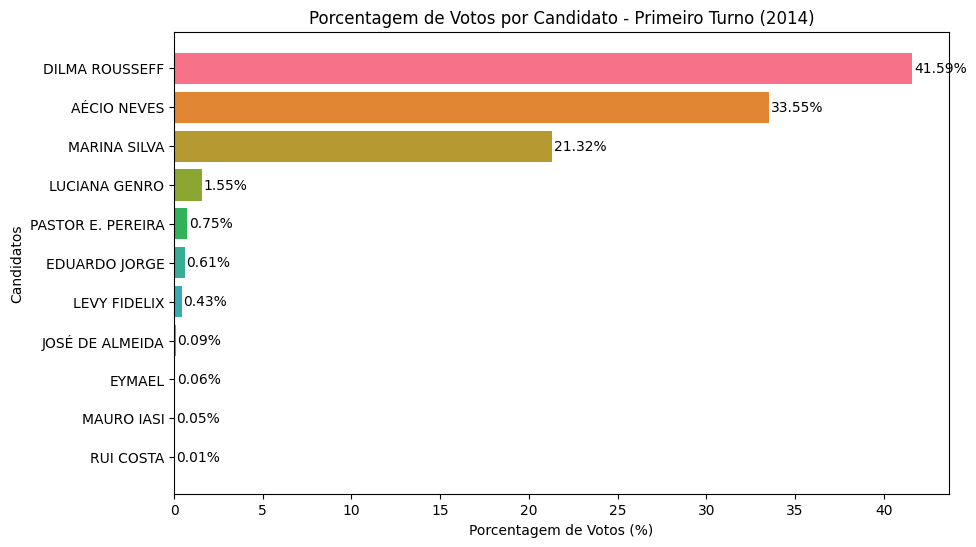

In [128]:

# Plota o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
cores = sns.color_palette("husl", len(votos_por_candidato)) # Cores diferentes para cada candidato

plt.barh(votos_por_candidato.index, porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Primeiro Turno (2014)")

# Adiciona as porcentagens em cada barra
for i, v in enumerate(porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')


plt.gca().invert_yaxis() # Inverte o eixo y para ordem decrescente
plt.show()

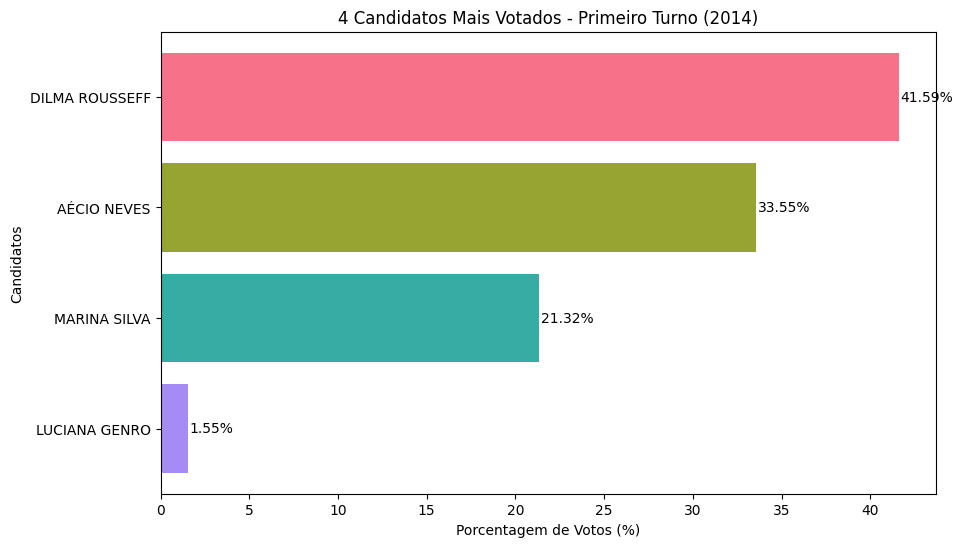

In [129]:
# prompt: Agora faça um gráfico em barra "deitado" com os 4 candidatos mais votados , com os votos em porcentagem

# Pega os 4 primeiros candidatos
top4_candidatos = votos_por_candidato.head(4)
top4_porcentagens = porcentagens.head(4)

# Plota o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
cores = sns.color_palette("husl", len(top4_candidatos))

plt.barh(top4_candidatos.index, top4_porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("4 Candidatos Mais Votados - Primeiro Turno (2014)")

# Adiciona as porcentagens em cada barra
for i, v in enumerate(top4_porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

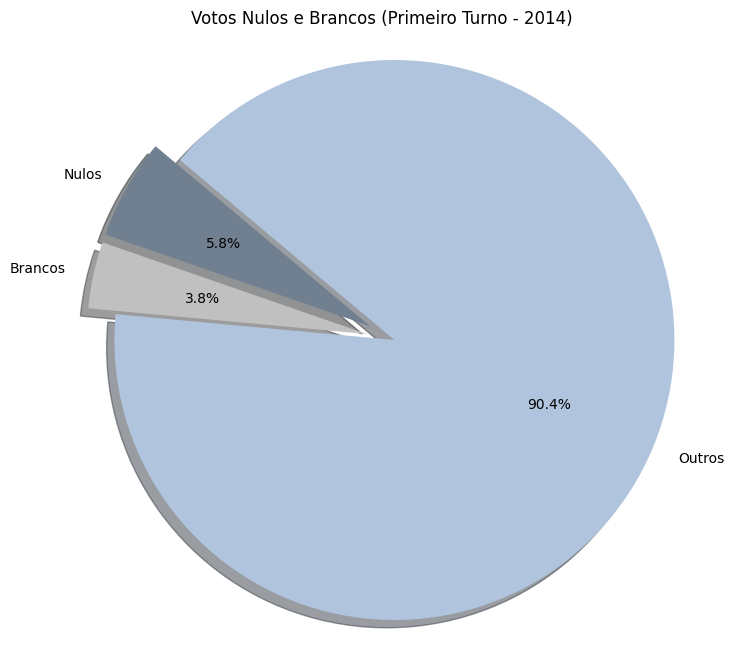

In [150]:
# prompt: faça gráfico em pizza com o total de votos em número e porcentagem dos candidato 'brancos' e 'nulos' em relação a todos os outros candidatos

# Calculando votos nulos e brancos
votos_nulos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO']['QT_VOTOS'].sum()
votos_brancos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO']['QT_VOTOS'].sum()

# Total de votos nulos e brancos
total_nulos_brancos = votos_nulos + votos_brancos

# Total de votos válidos (excluindo nulos e brancos)
total_votos_validos = df_turno1['QT_VOTOS'].sum() - total_nulos_brancos

# Criando o gráfico de pizza
labels = ['Nulos', 'Brancos', 'Outros']
sizes = [votos_nulos, votos_brancos, total_votos_validos]
colors = ['slategray', 'silver', 'lightsteelblue']
explode = (0.1, 0.1, 0)  # explode 1st slice

#Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Votos Nulos e Brancos (Primeiro Turno - 2014)')
plt.show()

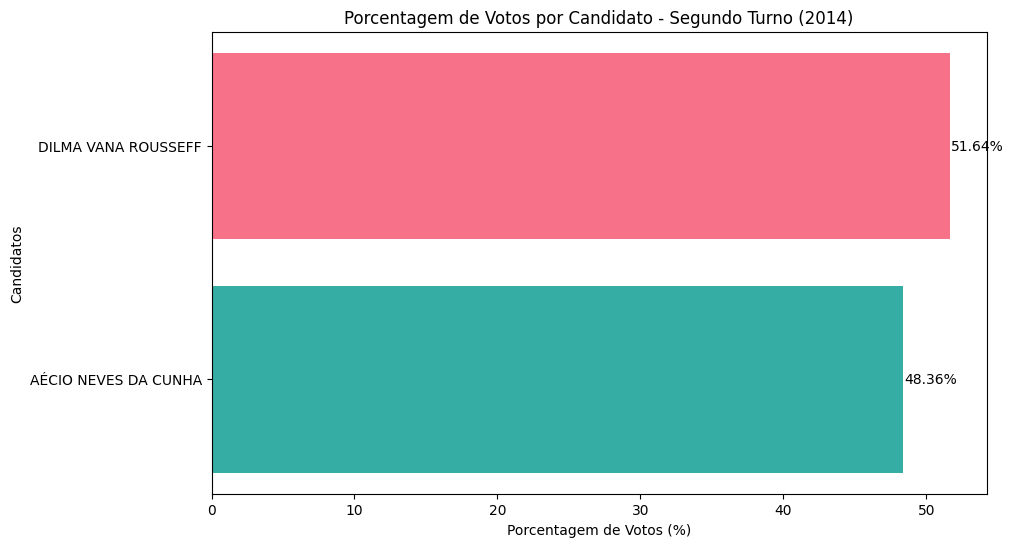

In [188]:
# prompt: agora faça um gráfico em barra horizontal em ordem descrescente com o total de votos em porcentagem dos candidatos do turno2, retirando os votos 'brancos' e 'nulos' do gráfico, coloque cores diferentes pros candidados

# Agrupa os votos por candidato e soma a quantidade de votos para o segundo turno
votos_por_candidato_t2 = df_turno2.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

# Removendo os votos nulos e brancos do segundo turno
votos_por_candidato_t2 = votos_por_candidato_t2.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

# Ordenando os votos em ordem decrescente para o segundo turno
votos_por_candidato_t2 = votos_por_candidato_t2.sort_values(ascending=False)

# Calculando a porcentagem de votos por candidato para o segundo turno
total_votos_t2 = votos_por_candidato_t2.sum()
porcentagens_t2 = (votos_por_candidato_t2 / total_votos_t2) * 100

# Renomeando os nomes dos candidatos para o segundo turno (se necessário)
# ... (adicione aqui as renomeações necessárias para o segundo turno, similar ao primeiro turno)


# Plota o gráfico de barras horizontal para o segundo turno
plt.figure(figsize=(10, 6))
cores = sns.color_palette("husl", len(votos_por_candidato_t2))  # Cores diferentes para cada candidato

plt.barh(votos_por_candidato_t2.index, porcentagens_t2, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Segundo Turno (2014)")

# Adiciona as porcentagens em cada barra
for i, v in enumerate(porcentagens_t2):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()  # Inverte o eixo y para ordem decrescente
plt.show()

In [171]:
votos_por_estado = df_turno1.groupby('SG_UF')['QT_VOTOS'].sum()

# Ordena em ordem decrescente
votos_por_estado = votos_por_estado.sort_values(ascending=False)


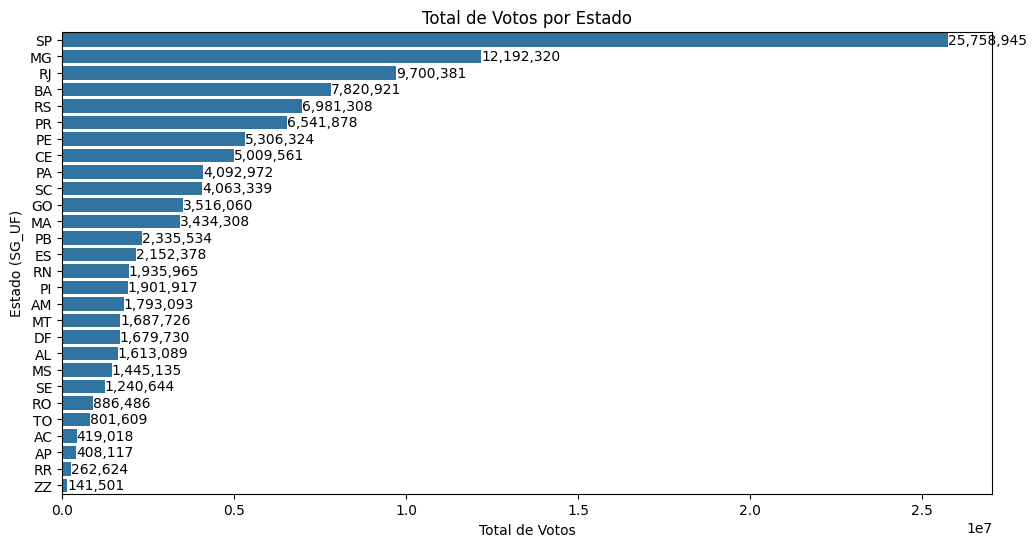

In [173]:
# Plota o gráfico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x=votos_por_estado.values, y=votos_por_estado.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estado (SG_UF)')
plt.title('Total de Votos por Estado')

# Adiciona a quantidade de votos em cada barra
for i, v in enumerate(votos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()



In [179]:
# prompt: agora faça um gráfico em barra deitada em ordem decrescente com o somatório de votos nulos por estado, tirando os votos 'brancos' e outros 'candidato'

# Agrupa por estado e soma os votos nulos, excluindo outros candidatos e votos brancos
votos_nulos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO'].groupby('SG_UF')['QT_VOTOS'].sum()

# Ordena os votos nulos em ordem decrescente
votos_nulos_por_estado = votos_nulos_por_estado.sort_values(ascending=False)

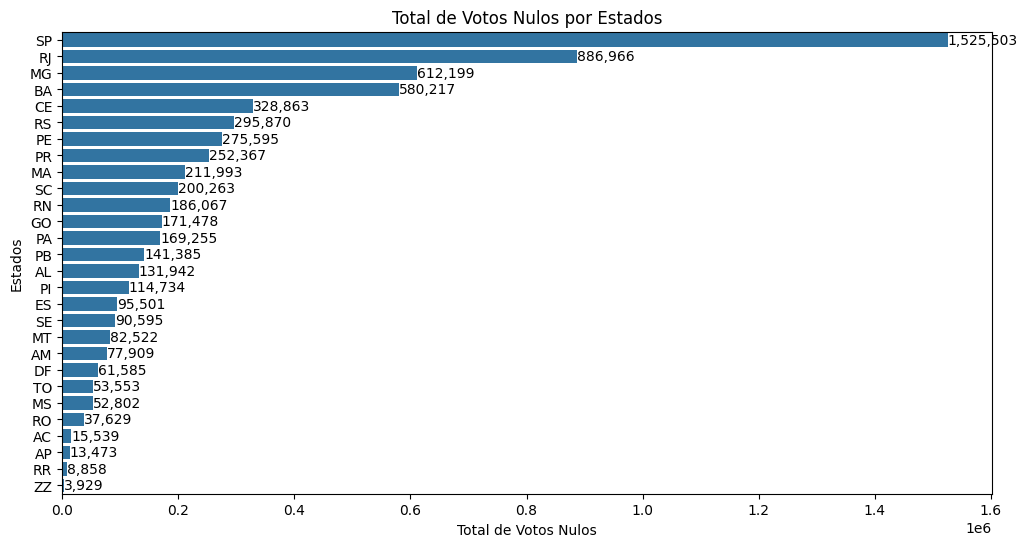

In [182]:


# Plota o gráfico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x=votos_nulos_por_estado.values, y=votos_nulos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Nulos')
plt.ylabel('Estados')
plt.title('Total de Votos Nulos por Estados')

# Adiciona a quantidade de votos em cada barra
for i, v in enumerate(votos_nulos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

In [184]:
# prompt: agora faça um gráfico em barra deitada em ordem decrescente com o somatório de votos brancos por estado, tirando os votos 'nulos' e outros 'candidato'

# Agrupa por estado e soma os votos brancos, excluindo outros candidatos e votos nulos
votos_brancos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO'].groupby('SG_UF')['QT_VOTOS'].sum()

# Ordena os votos brancos em ordem decrescente
votos_brancos_por_estado = votos_brancos_por_estado.sort_values(ascending=False)



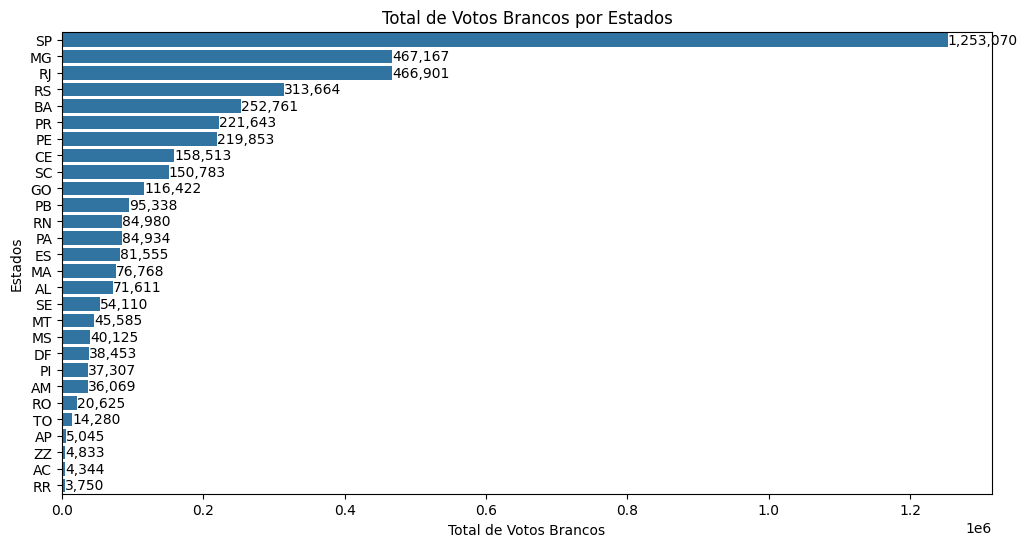

In [185]:
# Plota o gráfico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x=votos_brancos_por_estado.values, y=votos_brancos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Brancos')
plt.ylabel('Estados')
plt.title('Total de Votos Brancos por Estados')

# Adiciona a quantidade de votos em cada barra
for i, v in enumerate(votos_brancos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()